# Clasificación: k-Nearest Neighbors

Al igual que sucedía con regresión, el algoritmo de los **k vecinos más cercanos (kNN)** se puede utilizar como modelo de clasificación.

En lugar de devolver un valor continuo, para clasificación se devolverá la etiqueta más frecuente de los k vecinos al punto que se quiere clasificar. También es posible ponderar esta decisión aplicando un peso a la etiqueta de cada vecino dependiendo de la distancia del mismo a la observación que se pretende clasificar.

Para demostrar el funcionamiento de **KNN** como modelo de clasificación vamos a utilizar otra función generadora de conjuntos de datos sintéticos: `make_moons`.

In [ ]:
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_moons

A continuación definimos el modelo **kNN** desde cero:

In [ ]:
# returns the classification of x data, by using k neighbours
def KNN_prediction(k, X, y, x):
    distance = []
    for i in range(len(X)): 
        # create pairs (X[i], y[i], distance from x to X[i])
        distance.append((X[i],y[i],math.sqrt((x[0]-X[i][0])**2)+(x[1]-
                         X[i][1])**2)) 
    # sorts distance vector attending to the distances from x to X[i]  
    sorted_list = sort(distance)  
    
    x1_neighbourhood, x2_neighbourhood, y_label = [], [], []; 

    for i in range(k):  # k-neighbours
        y_label.append(sorted_list[i][1])
        x1_neighbourhood.append(sorted_list[i][0][0])
        x2_neighbourhood.append(sorted_list[i][0][1]) 
    return x1_neighbourhood, x2_neighbourhood, y_label

def sort(unsorted_list):
    return (sorted(unsorted_list, key = lambda x: x[2]))

# returns label (binary version)
def prediction(y_label):
    sum_0, sum_1 = 0, 0
    for i in range(len(y_label)):
        if y_label[i]==0:
            sum_0 += 1
        else:
            sum_1 += 1
    if sum_0 >= sum_1:
        return 0
    else:
        return 1

def plot(x1_neighbourhood, x2_neighbourhood, vector_to_predict, y_label):
    # plots neighbours
    if (prediction(y_label) == 1):
        color = 'g'; marker = '^'
    else:
        color = 'y'; marker = 'o'
        
    # plot neighbourhood        
    plt.scatter(x1_neighbourhood, x2_neighbourhood, color='r', marker='o')
    
    # plot value to predict
    plt.scatter(vector_to_predict[0], vector_to_predict[1], color=color, 
                edgecolor='r', s=140, marker=marker, label='prediction')
    return

Generamos el *dataset* sintético con `make_moons`:

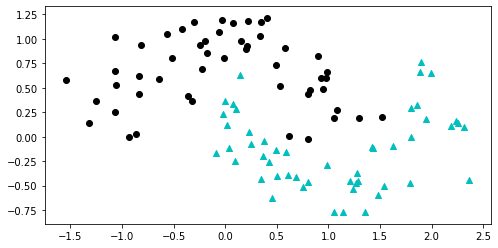

In [ ]:
X,y = make_moons(n_samples=100,noise=0.2, random_state=10, )
plt.figure(figsize=(8,4))
for target, color, marker in zip(range(2),['k','c'],['o','^']):
    plt.scatter(X[y==target,0], X[y==target,1],c=color, marker=marker, label='class '+format(target))

Por último realizamos algunas predicciones:

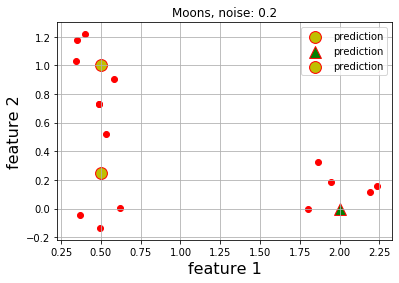

In [ ]:
#vector_to_predict = [0.5,0.25]  # fits the model
for vector_to_predict in [[0.5,0.25], [2,0], [0.5,1]]:
    x1_neighbourhood, x2_neighbourhood, y_label = KNN_prediction(5, X, y,
                                              vector_to_predict)
    plot(x1_neighbourhood, x2_neighbourhood, vector_to_predict, y_label)

plt.legend()    
plt.xlabel('feature 1', fontsize=16)
plt.ylabel('feature 2', fontsize=16)
plt.title('Moons, noise: ' + format(0.2))
plt.grid()
plt.show()

# kNN en scikit-learn

El modelo de clasificación basado en **kNN** también está disponible en la librería *scikit-learn*: `KNeighborsClassifier`. Vamos a comprobar su funcionamiento usando el *dataset* de las características de flores conocido como *iris*.

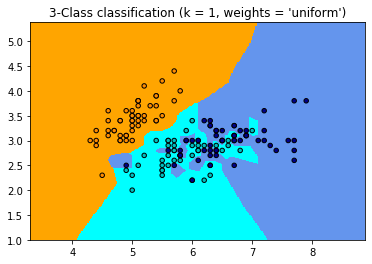

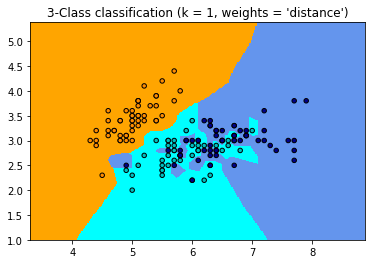

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

---

Creado por **Raúl Lara** (raul.lara@upm.es) y **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">